In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Cyclegan

In [3]:
from fastai.conv_learner import *
from fastai.dataset import *

import warnings
warnings.filterwarnings("ignore")

In [4]:
from cgan.options.train_options import *

In [5]:
opt = TrainOptions().parse(['--dataroot', '/fastai/data/pytorch-CycleGAN-and-pix2pix/datasets/horse2zebra',
                            '--nThreads', '8', '--no_dropout', '--niter', '100', '--niter_decay', '100',
                            '--name', 'nodrop', '--gpu_ids', '0'])

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: /fastai/data/pytorch-CycleGAN-and-pix2pix/datasets/horse2zebra
dataset_mode: unaligned
display_freq: 100
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 256
gpu_ids: [0]
init_type: normal
input_nc: 3
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
lambda_identity: 0.5
loadSize: 286
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 8
n_layers_D: 3
name: nodrop
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_dropout: True
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1000
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- En

In [6]:
from cgan.options.train_options import TrainOptions
from cgan.data.data_loader import CreateDataLoader
from cgan.models.models import create_model

In [7]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size

CustomDatasetDataLoader
dataset [UnalignedDataset] was created


1334

In [8]:
model = create_model(opt)

cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): I

In [9]:
# opt.niter=9
# opt.niter_decay=1

In [10]:
total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay +1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0
    
    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()
        
        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0
            
        if total_steps % opt.print_freq == 0:
            errors =  model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize
            
        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')
            
        iter_data_time = time.time()
        
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)
        
    print('End of epoch %d /%d \t Time Taken: %d sec' %
           (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()

1334it [12:31,  1.78it/s]
End of epoch 1 /200 	 Time Taken: 751 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
End of epoch 2 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
End of epoch 3 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
997it [09:20,  1.78it/s]saving the latest model (epoch 4, total_steps 5000)
1334it [12:29,  1.78it/s]
End of epoch 4 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
saving the model at the end of epoch 5, iters 6670
End of epoch 5 /200 	 Time Taken: 750 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
End of epoch 6 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
End of epoch 7 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
661it [06:11,  1.78it/s]saving the latest model (epoch 8, total_steps 10000)
1334it [12:29,  1.78it/s]
End of epoch 8 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
1334it [12:28,  1.78it/s]
End of epoch 9 /20

1334it [12:29,  1.78it/s]
End of epoch 66 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
1334it [12:58,  1.71it/s]
End of epoch 67 /200 	 Time Taken: 778 sec
learning rate = 0.0002000
621it [05:49,  1.78it/s]saving the latest model (epoch 68, total_steps 90000)
1334it [12:31,  1.78it/s]
End of epoch 68 /200 	 Time Taken: 751 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
End of epoch 69 /200 	 Time Taken: 749 sec
learning rate = 0.0002000
1334it [12:31,  1.77it/s]
saving the model at the end of epoch 70, iters 93380
End of epoch 70 /200 	 Time Taken: 752 sec
learning rate = 0.0002000
1334it [12:31,  1.77it/s]
End of epoch 71 /200 	 Time Taken: 751 sec
learning rate = 0.0002000
285it [02:40,  1.77it/s]saving the latest model (epoch 72, total_steps 95000)
1334it [12:30,  1.78it/s]
End of epoch 72 /200 	 Time Taken: 750 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
End of epoch 73 /200 	 Time Taken: 750 sec
learning rate = 0.0002000
1334it [12:29,  1.78it/s]
End o

End of epoch 130 /200 	 Time Taken: 750 sec
learning rate = 0.0001386
1334it [12:29,  1.78it/s]
End of epoch 131 /200 	 Time Taken: 749 sec
learning rate = 0.0001366
245it [02:18,  1.77it/s]saving the latest model (epoch 132, total_steps 175000)
1334it [12:29,  1.78it/s]
End of epoch 132 /200 	 Time Taken: 750 sec
learning rate = 0.0001347
1334it [12:29,  1.78it/s]
End of epoch 133 /200 	 Time Taken: 749 sec
learning rate = 0.0001327
1334it [12:29,  1.78it/s]
End of epoch 134 /200 	 Time Taken: 749 sec
learning rate = 0.0001307
1243it [11:38,  1.78it/s]saving the latest model (epoch 135, total_steps 180000)
1334it [12:30,  1.78it/s]
saving the model at the end of epoch 135, iters 180090
End of epoch 135 /200 	 Time Taken: 750 sec
learning rate = 0.0001287
1334it [12:29,  1.78it/s]
End of epoch 136 /200 	 Time Taken: 749 sec
learning rate = 0.0001267
1334it [12:29,  1.78it/s]
End of epoch 137 /200 	 Time Taken: 749 sec
learning rate = 0.0001248
1334it [12:29,  1.78it/s]
End of epoch 138

1203it [11:17,  1.78it/s]saving the latest model (epoch 195, total_steps 260000)
1334it [12:31,  1.78it/s]
saving the model at the end of epoch 195, iters 260130
End of epoch 195 /200 	 Time Taken: 751 sec
learning rate = 0.0000099
1334it [12:29,  1.78it/s]
End of epoch 196 /200 	 Time Taken: 749 sec
learning rate = 0.0000079
1334it [12:29,  1.78it/s]
End of epoch 197 /200 	 Time Taken: 749 sec
learning rate = 0.0000059
1334it [12:30,  1.78it/s]
End of epoch 198 /200 	 Time Taken: 750 sec
learning rate = 0.0000040
867it [08:08,  1.78it/s]saving the latest model (epoch 199, total_steps 265000)
1334it [12:31,  1.78it/s]
End of epoch 199 /200 	 Time Taken: 751 sec
learning rate = 0.0000020
1334it [12:29,  1.78it/s]
saving the model at the end of epoch 200, iters 266800
End of epoch 200 /200 	 Time Taken: 750 sec
learning rate = 0.0000000


In [11]:
def show_img(im, ax=None, figsize=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [12]:
def get_one(data):
    model.set_input(data)
    model.test()
    return list(model.get_current_visuals().values())

In [13]:
model.save(201)

In [33]:
test_ims = []
for i,o in enumerate(dataset):
    i += 10
    if i>20: break
    test_ims.append(get_one(o))

In [15]:
def show_grid(ims):
    fig,axes = plt.subplots(2,3,figsize=(9,6))
    for i,ax in enumerate(axes.flat): show_img(ims[i],ax);
    fig.tight_layout()

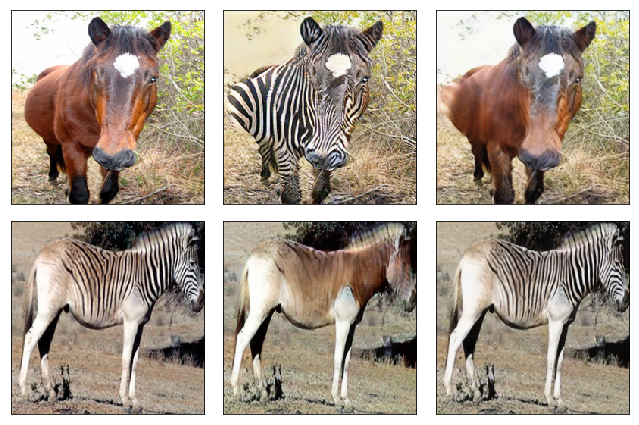

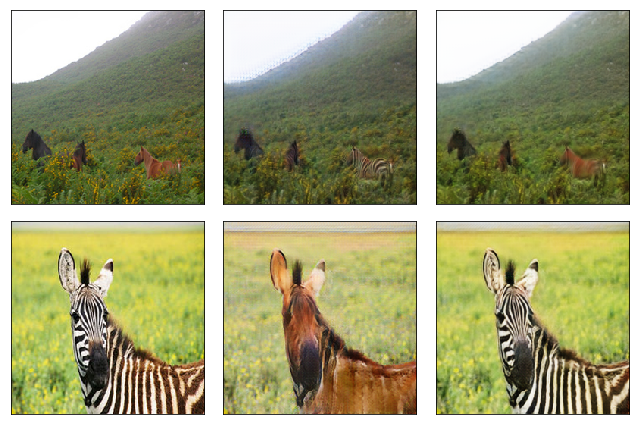

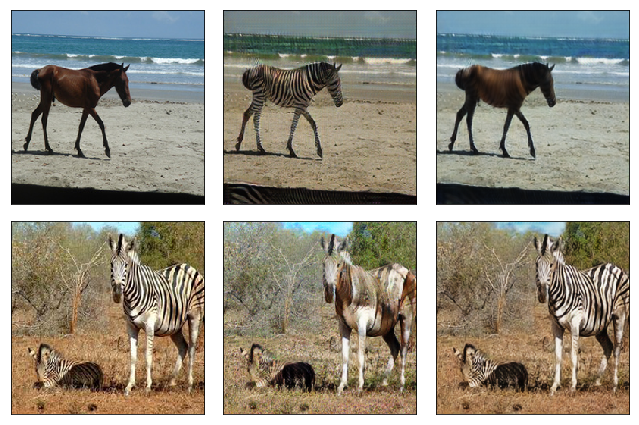

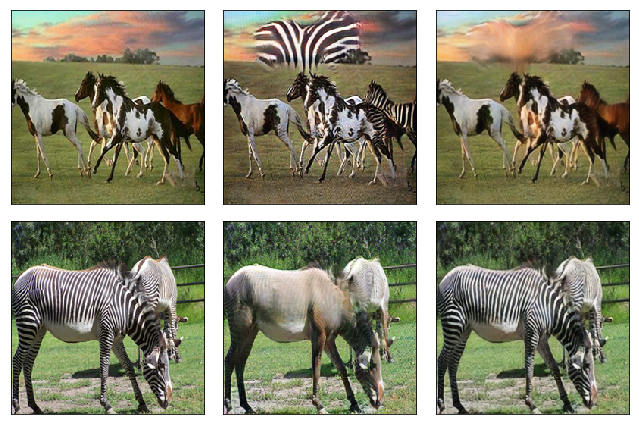

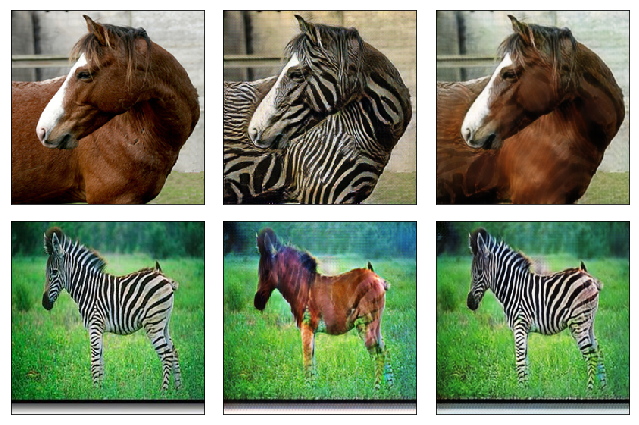

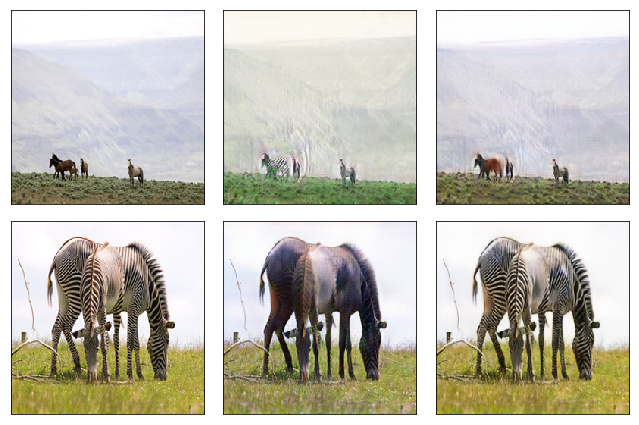

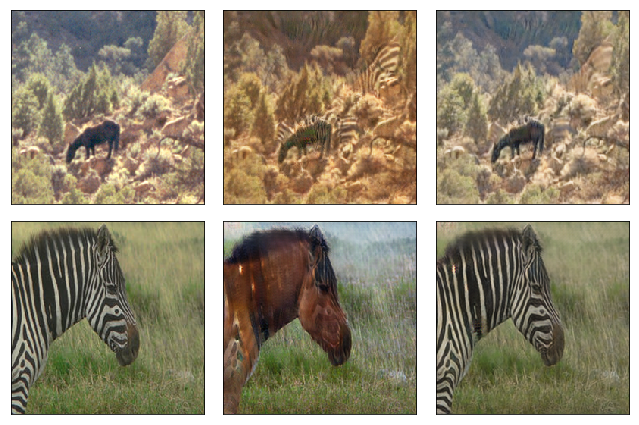

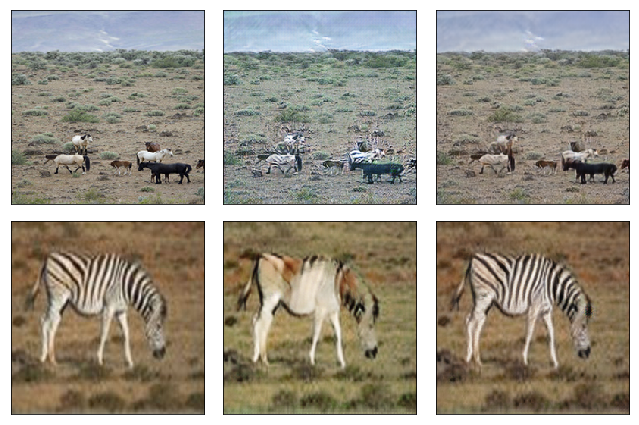

In [34]:
for i in range(8): show_grid(test_ims[i])

In [35]:
# ! wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip

## fin